# 여러 개의 판매보고서 합치기

- 여러 개의 대리점을 관리하고 있습니다. 
- 저녁 8시가 되면 각 대리점에서 오늘의 판매금액을 엑셀 파일로 보고합니다. 
- 판매금액이 적힌 여러 개의 엑셀 파일을 하나로 합쳐 오늘의 판매금액을 한눈에 확인합니다. 

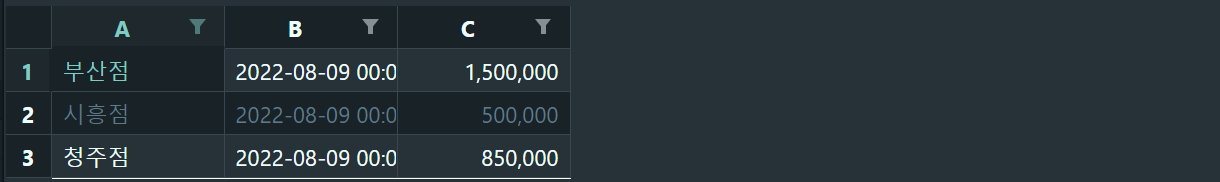

> - [Tip]
> - vscode의 Extension의 'Excel Viewer' 설치하면 편리
> 

In [1]:
# 라이브러리 설치

%pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 3.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 경로 읽기
import glob
sale_reports = glob.glob(r'./판매보고/판매보고_*.xlsx')
sale_reports

['./판매보고/판매보고_부산점.xlsx', './판매보고/판매보고_시흥점.xlsx', './판매보고/판매보고_청주점.xlsx']

> * 파일 1개(만매보고_대전점.xlsx)가 리스트업 되지 않는다.

In [3]:
# 경로 읽기
import os
sale_reports = os.listdir(r'./판매보고')
sale_reports

['만매보고_대전점.xlsx', '판매보고_부산점.xlsx', '판매보고_시흥점.xlsx', '판매보고_청주점.xlsx']

In [5]:
#엑셀 파일 읽기
from openpyxl import load_workbook
from openpyxl import Workbook

exelfile = './판매보고/판매보고_부산점.xlsx'
wb = load_workbook(exelfile, data_only=True)
ws = wb.active
print(ws['B1'].value,str(ws['B2'].value),ws['B3'].value)
wb.close()


부산점 2022-08-09 00:00:00 1500000


In [6]:
# 엑셀파일 쓰기

wb = Workbook()
ws  = wb.active
# openpyxl에서 행과 열은 인덱스가 1부터 시작
# 값 쓰기
ws.cell(row=1,column=1).value = "1-1"
ws.cell(row=1,column=2).value = "1-1"
ws.cell(row=1,column=3).value = "1-2"

wb.save(r"결과.xlsx")
wb.close()

## 함수만들기

In [8]:
# 리포트 리스트 가져오기
def getReports(dir):
    import os
    return os.listdir(dir)

In [16]:
#개별 지점 리포트 내용 가져오기
def getValue(report):
    wb = load_workbook(report, data_only=True)
    ws = wb.active

    shop = ws['B1'].value
    sale_date = str(ws['B2'].value)
    sale_total = ws['B3'].value

    wb.close()

    return shop,sale_date,sale_total

In [19]:
#결과 리포트에 지점 데이터 추가하기
def addReport(ws,rowIdx,*args):
    for idx, arg in enumerate(args):
        # print(rowIdx,idx)
        ws.cell(row=rowIdx+1,column=idx+1).value = arg

In [20]:
# 오늘 날짜 가져오기
def getToday():
    from datetime import datetime
    return datetime.now().strftime("%y_%m_%d")

## 종합 코드

In [23]:
import glob
from openpyxl import load_workbook
from openpyxl import Workbook

# 리포트 리스트 가져오기
DIR = './판매보고'
sale_reports = getReports(DIR)


wb = Workbook()
ws = wb.active

for i, report in enumerate(sale_reports):
    # print(f'{DIR}/{report}')
    shop,sale_date,sale_total = getValue(f'{DIR}/{report}') #개별 지점 리포트 내용 가져오기
    # print(shop,sale_date,sale_total)
    addReport(ws,i,shop,sale_date,sale_total)               #결과 리포트에 지점 데이터 추가하기

wb.save(f"결과_{getToday()}.xlsx")       # 오늘 날짜 가져오기, 결과_2023_04_08.xlsx 형식으로 저장
wb.close()    